# Explore here
### Regresion Logistica
#### Banking Marketing Campaign

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

#### Step 1: Loading the dataset

In [13]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv" , sep = ";")
total_data.head()

HTTPError: HTTP Error 500: Internal Server Error

#### Step 2: Perform a full EDA

In [ ]:
# Dataset shape:

total_data.shape

(41188, 21)

The dataset has 41,188 records and 21 columns (variables).

In [ ]:
# Dataset info: in Dtype column we see the variable type, if it is categorical or numeric.

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Separate in 2 lists the numeric and categorical variables:

object_variables = total_data.select_dtypes(include=['object']).columns.tolist()
numeric_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", object_variables)
print("Numeric variables:", numeric_variables)

Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numeric variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
# Null Dataframe:

total_data.isnull().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

El dataset no presenta valores nulos.

Check duplicated records: We cannot check if there are duplicated information because we do not know the ID for each client and all the columns have records that could be repited for more than one person.

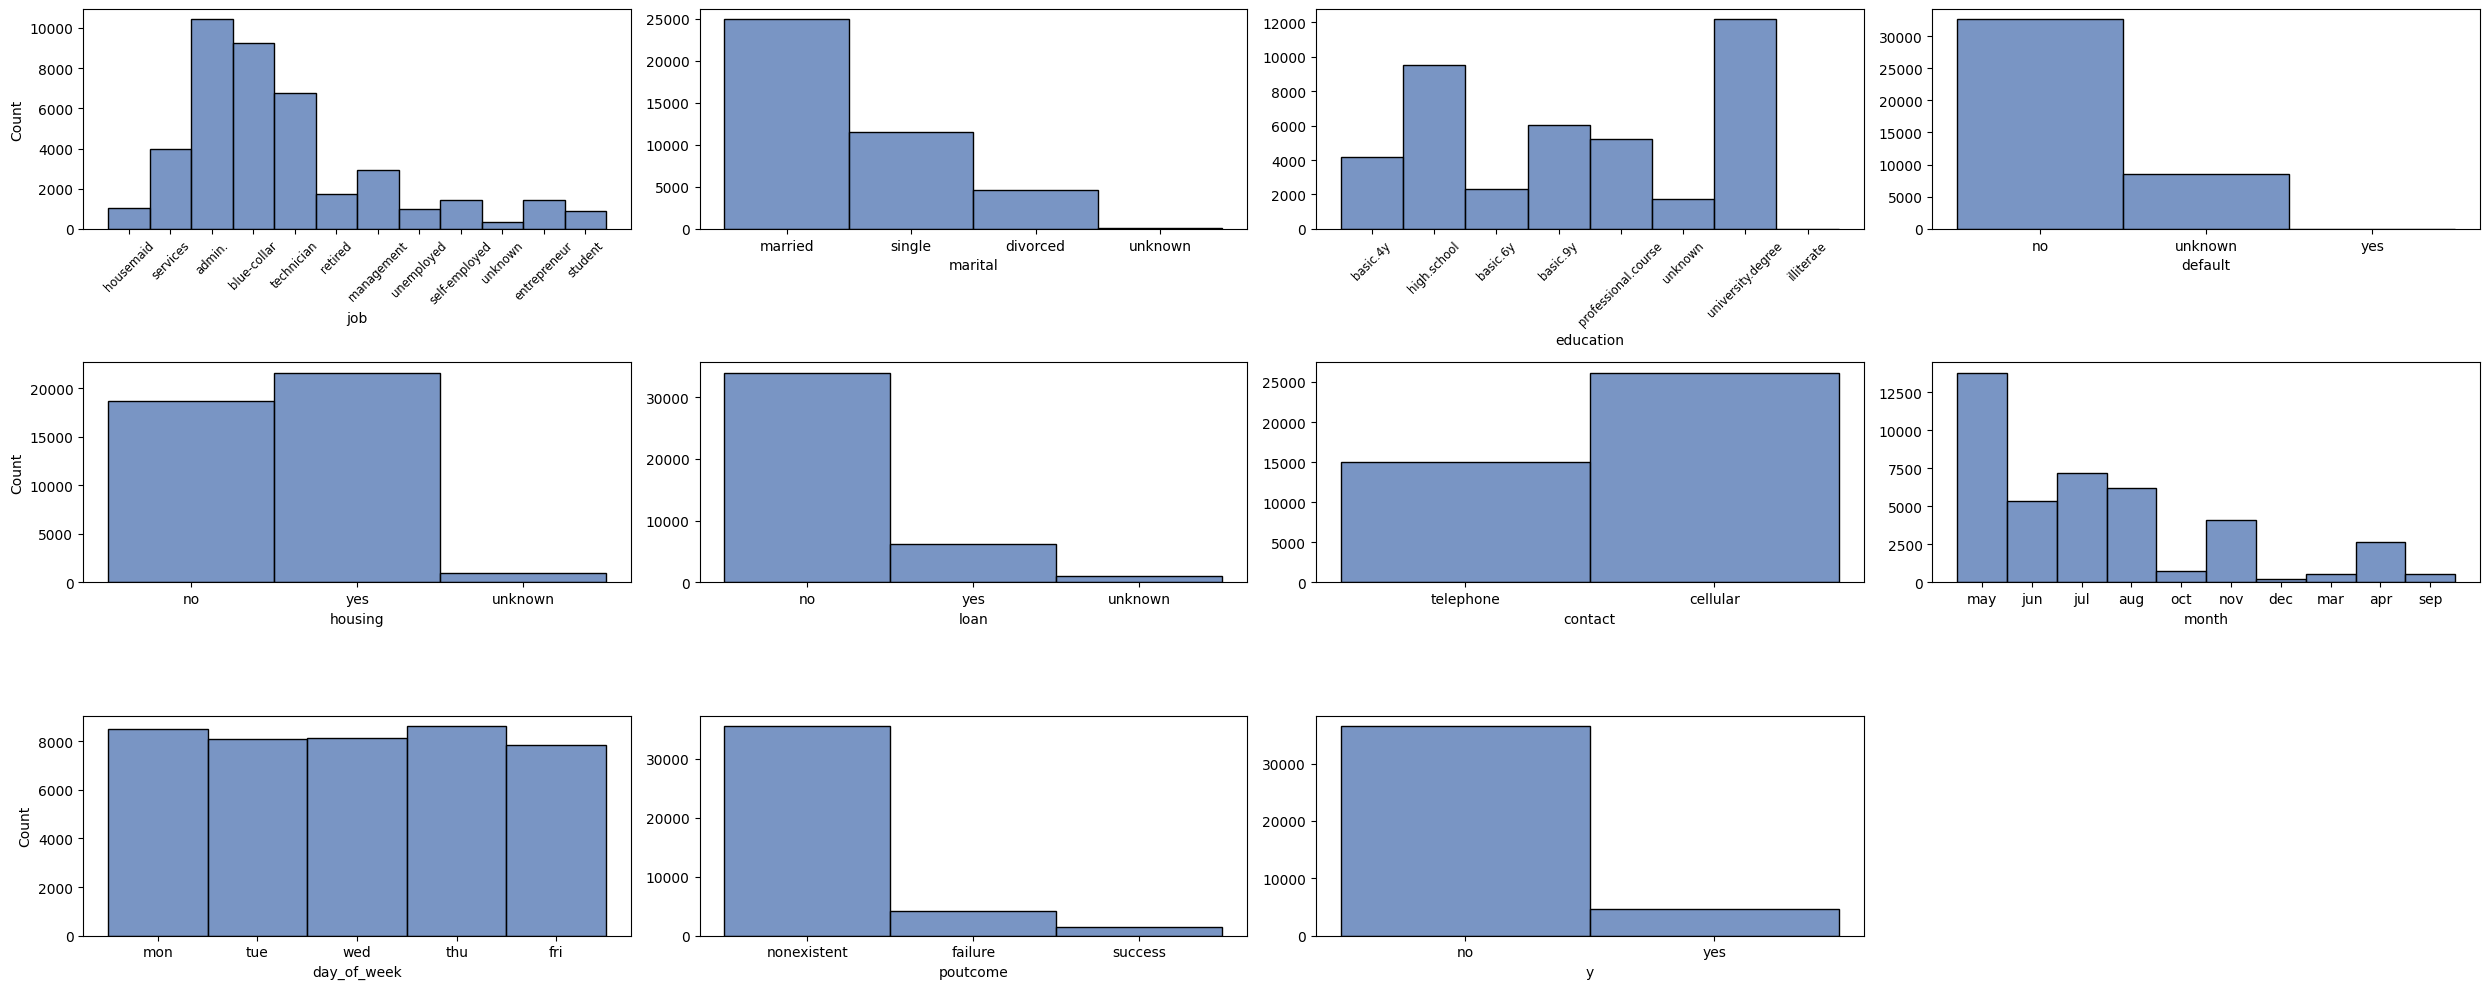

In [ ]:
# Univariate Analysis:
# Histograms for categorical variables.
# Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_palette("deep")

fig, axes = plt.subplots(3, 4, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data = total_data, x='job')
axes[0,0].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0,1], data = total_data, x='marital').set(ylabel = None)
sns.histplot(ax=axes[0,2], data = total_data, x='education').set(ylabel = None)
axes[0,2].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0,3], data = total_data, x='default').set(ylabel = None)

sns.histplot(ax=axes[1,0], data = total_data, x='housing')
sns.histplot(ax=axes[1,1], data = total_data, x='loan').set(ylabel = None)
sns.histplot(ax=axes[1,2], data = total_data, x='contact').set(ylabel = None)
sns.histplot(ax=axes[1,3], data = total_data, x='month').set(ylabel = None)

sns.histplot(ax=axes[2,0], data = total_data, x='day_of_week')
sns.histplot(ax=axes[2,1], data = total_data, x='poutcome').set(ylabel = None)
sns.histplot(ax=axes[2,2], data = total_data, x='y').set(ylabel = None)
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Groups inside Job category:
job_types = total_data['job'].value_counts()
percent_jobs = (job_types / len(total_data['job'])).round(3) * 100
print(percent_jobs)

job
admin.           25.3
blue-collar      22.5
technician       16.4
services          9.6
management        7.1
retired           4.2
entrepreneur      3.5
self-employed     3.5
housemaid         2.6
unemployed        2.5
student           2.1
unknown           0.8
Name: count, dtype: float64


In [ ]:
# Groups inside Marital category:
marital_types = total_data['marital'].value_counts()
percent_marital = (marital_types / len(total_data['marital'])).round(3) * 100
print(percent_marital)

marital
married     60.5
single      28.1
divorced    11.2
unknown      0.2
Name: count, dtype: float64


In [ ]:
# Groups inside Education category:
education_types = total_data['education'].value_counts()
percent_education = (education_types / len(total_data['education'])).round(3) * 100
print(percent_education)

education
university.degree      29.5
high.school            23.1
basic.9y               14.7
professional.course    12.7
basic.4y               10.1
basic.6y                5.6
unknown                 4.2
illiterate              0.0
Name: count, dtype: float64


In [ ]:
# Groups inside Default category:
default_types = total_data['default'].value_counts()
percent_default = (default_types / len(total_data['default'])).round(3) * 100
print(percent_default)

default
no         79.1
unknown    20.9
yes         0.0
Name: count, dtype: float64


In [ ]:
# Groups inside Loan category:
loan_types = total_data['loan'].value_counts()
percent_loan = (loan_types / len(total_data['loan'])).round(3) * 100
print(percent_loan)

loan
no         82.4
yes        15.2
unknown     2.4
Name: count, dtype: float64


First Conclusions:
- The most popular job are: admin (25.3%), blue-collar (22.5%) and technician (16.4%).
- A 60.5% of the clients are married, 28.1% are single and 11.2% are divorced.
- People with university degree and high school together account for 52.6% of the total.
- 79.1% and 82.4% of the clients do not possess credit and personal loan respectively.
- The marjority of the clients reject the marketing campaign.
- Between May and August there was a higher volume of contacts.
- The marjority of the clients reject the long-term deposit.

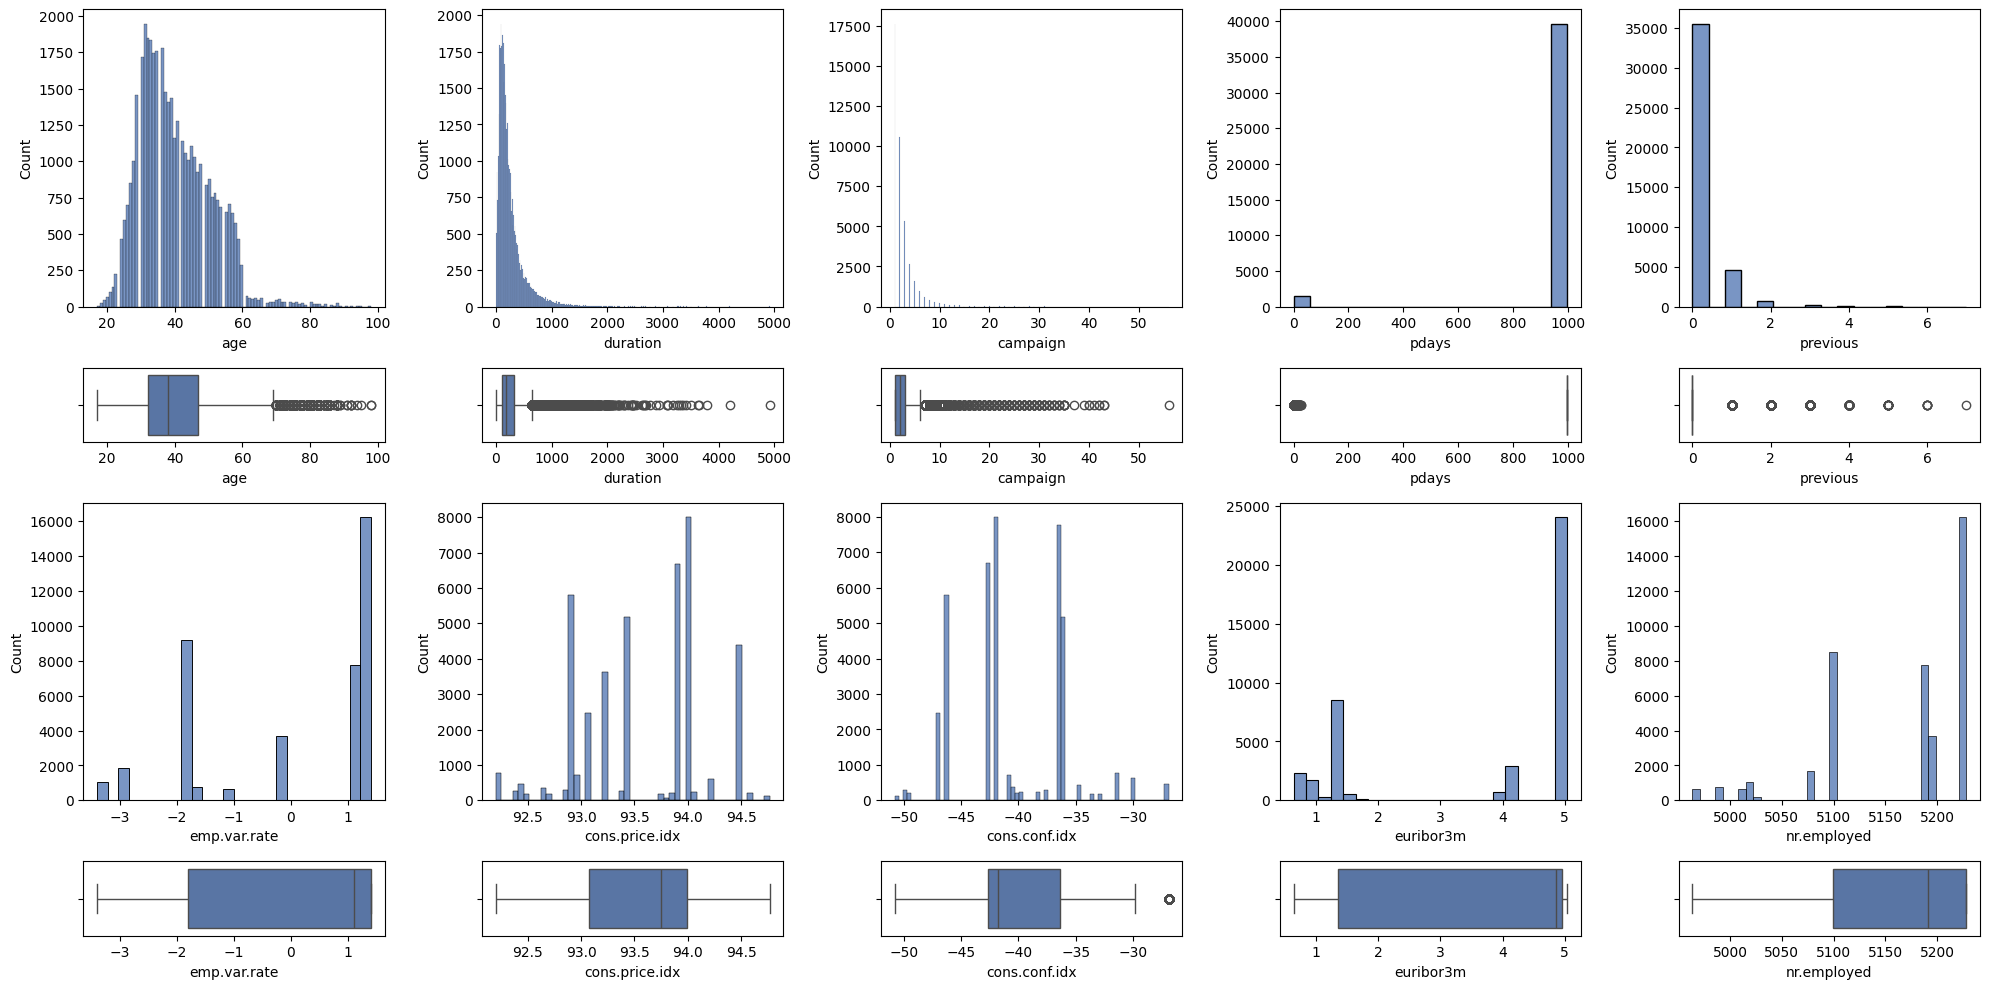

In [ ]:
# Univariate Analysis:
# Histograms and boxplot for numeric variables.
# Numeric variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 5, figsize = (20, 10), gridspec_kw = {"height_ratios": [16, 4, 16, 4]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "duration")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "duration")

sns.histplot(ax = axis[0, 2], data = total_data, x = "campaign")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "campaign")

sns.histplot(ax = axis[0, 3], data = total_data, x = "pdays")
sns.boxplot(ax = axis[1, 3], data = total_data, x = "pdays")

sns.histplot(ax = axis[0, 4], data = total_data, x = "previous")
sns.boxplot(ax = axis[1, 4], data = total_data, x = "previous")

sns.histplot(ax = axis[2, 0], data = total_data, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "emp.var.rate")

sns.histplot(ax = axis[2, 1], data = total_data, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "cons.price.idx")

sns.histplot(ax = axis[2, 2], data = total_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "cons.conf.idx")

sns.histplot(ax = axis[2, 3], data = total_data, x = "euribor3m")
sns.boxplot(ax = axis[3, 3], data = total_data, x = "euribor3m")

sns.histplot(ax = axis[2, 4], data = total_data, x = "nr.employed")
sns.boxplot(ax = axis[3, 4], data = total_data, x = "nr.employed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# Groups inside Age category:
age_types = total_data['nr.employed'].value_counts()
percent_age = (age_types / len(total_data['nr.employed'])).round(3).sort_values(ascending = False) * 100
print(percent_age.head(100))

nr.employed
5228.1    39.4
5099.1    20.7
5191.0    18.8
5195.8     8.9
5076.2     4.0
5017.5     2.6
4991.6     1.9
5008.7     1.6
4963.6     1.5
5023.5     0.4
5176.3     0.0
Name: count, dtype: float64


Conclusions for numeric analysis:
- age: 31 - 50 years old
- duration: 0 - 250 seconds
- campaign: 1 - 5 contacts
- pdays: 999 days
- previous: 86.3% no, 11.1% once.
- emp.var.rate: 39.4% for 1.4, 22.3% for -1.8 and 18.8% for 1.1.
- cons.conf.idx:    

93.994  --  18.8

93.918  --  16.2

92.893  --  14.1

93.444  --  12.6
                   
94.465  --  10.6
- euribor3m: 5
- nr.employed: 5100 - 5200

- age. Age of customer (numeric)
- job. Type of job (categorical)
- marital. Marital status (categorical)
- education. Level of education (categorical)
- default. do you currently have credit (categorical) 
- housing. do you have a housing loan (categorical)
- loan. Do you have a personal loan? (categorical)
- contact. Type of contact communication (categorical)
- month. Last month in which you have been contacted (categorical)
- day_of_week. Last day on which you have been contacted (categorical)
- duration. Duration of previous contact in seconds (numeric)
- campaign. Number of contacts made during this campaign to the customer (numeric)
- pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- previous. Number of contacts made during the previous campaign to the customer (numeric)
- poutcome. Result of the previous marketing campaign (categorical).
- emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
- cons.price.idx. Consumer price index. Monthly indicator (numeric)
- cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
- euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
- nr.employed. Number of employees. Quarterly indicator (numeric)
- y. TARGET. Whether the customer takes out a long-term deposit or not

#### Step 3: Build a logistic regression model

#### Step 4: Optimize the previous model